In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

file = 'df4eda.csv'
df4eda = pd.read_csv(file, index_col=0)
df4eda

/tmp/ipykernel_525/2148175997.py:7: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df4eda = pd.read_csv(file, index_col=0)


,ProductID,Date,Zip,Units,Revenue_T,Manufacturer,Category,Segment,Product,isVanArsdel,...,Running Months,Rolling Period,Rolling Period Sort,MonthIndex,City,State,Region,District,ManufacturerID_y,MfgisVanArsdel
0,981,2014-12-30,6111,12,31676.40,Natura,Urban,Convenience,Natura UC-44,No,...,Running 12 Months,P-00,12.0,192,"Newington, CT",CT,East,District #02,8,No
1,1086,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-32,No,...,Running 12 Months,P-00,12.0,192,"Corona, CA",CA,West,District #38,10,No
2,1085,2014-12-30,92879,7,11020.59,Pirum,Rural,Productivity,Pirum RP-31,No,...,Running 12 Months,P-00,12.0,192,"Corona, CA",CA,West,District #38,10,No
3,489,2014-12-30,32901,3,35010.36,VanArsdel,Urban,Moderation,Maximus UM-94,Yes,...,Running 12 Months,P-00,12.0,192,"Melbourne, FL",FL,East,District #10,7,Yes
4,1989,2014-12-30,84770,3,16441.11,Currus,Rural,Select,Currus RS-08,No,...,Running 12 Months,P-00,12.0,192,"Saint George, UT",UT,West,District #38,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,990,2002-04-30,11752,1,5291.37,Natura,Urban,Convenience,Natura UC-53,No,...,NaN,NaN,NaN,40,"Islip Terrace, NY",NY,East,District #03,8,No
1048571,990,2002-04-30,39367,1,5291.37,Natura,Urban,Convenience,Natura UC-53,No,...,NaN,NaN,NaN,40,"Waynesboro, MS",MS,Central,District #24,8,No
1048572,2169,2002-04-30,98311,1,6614.37,Victoria,Urban,Extreme,Victoria UE-22,No,...,NaN,NaN,NaN,40,"Bremerton, WA",WA,West,District #34,14,No
1048573,1144,2002-04-30,95018,1,4976.37,Pirum,Urban,Regular,Pirum UR-01,No,...,NaN,NaN,NaN,40,"Felton, CA",CA,West,District #36,10,No


In [2]:
import dabl

types = dabl.detect_types(df4eda)
types

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
ProductID,False,False,False,True,False,False,False,False
Date,False,False,False,False,False,True,False,False
Zip,True,False,False,False,False,False,False,False
Units,False,False,False,False,False,False,False,True
Revenue_T,True,False,False,False,False,False,False,False
Manufacturer,False,False,False,False,True,False,False,False
Category,False,False,False,False,True,False,False,False
Segment,False,False,False,False,True,False,False,False
Product,False,False,False,False,True,False,False,False
isVanArsdel,False,False,False,False,True,False,False,False


/venv_eda/lib/python3.9/site-packages/dabl/plot/supervised.py:622: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification


/venv_eda/lib/python3.9/site-packages/dabl/plot/utils.py:692: UserWarning: Dropped 1259 outliers in column Revenue_T.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.123


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Manufacturer'>,
 [<Figure size 1600x1400 with 8 Axes>,
  array([[<Axes: title={'center': '0.193'}, xlabel='Revenue_T', ylabel='Rolling Period Sort'>,
          <Axes: title={'center': '0.191'}, xlabel='Revenue_T', ylabel='MonthNo(jittered)'>,
          <Axes: title={'center': '0.188'}, xlabel='Revenue_T', ylabel='Zip'>,
          <Axes: title={'center': '0.188'}, xlabel='Revenue_T', ylabel='Year(jittered)'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1600x400 with 4 Axes>],
 array([[<Axes: title={'center': 'ManufacturerID_y'}, xlabel='count', ylabel='ManufacturerID_y'>,
         <Axes: title={'center': 'Product'}, xlabel='count', ylabel='Product'>,
         <Axes: title={'center': 'ManufacturerID_x'}, xlabel='count', ylabel='ManufacturerID_x'>,
         <Axes: title={'center': 'ProductID'}, xlabel='count', ylabel='ProductID'>,
         <Axes: title={'center': 'isVanArsdel'}, xlab

/venv_eda/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


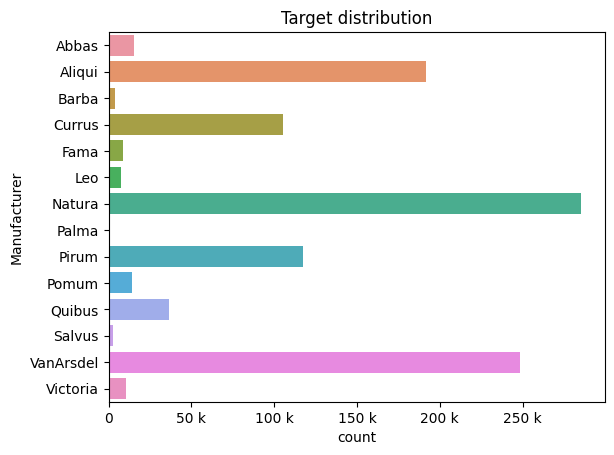

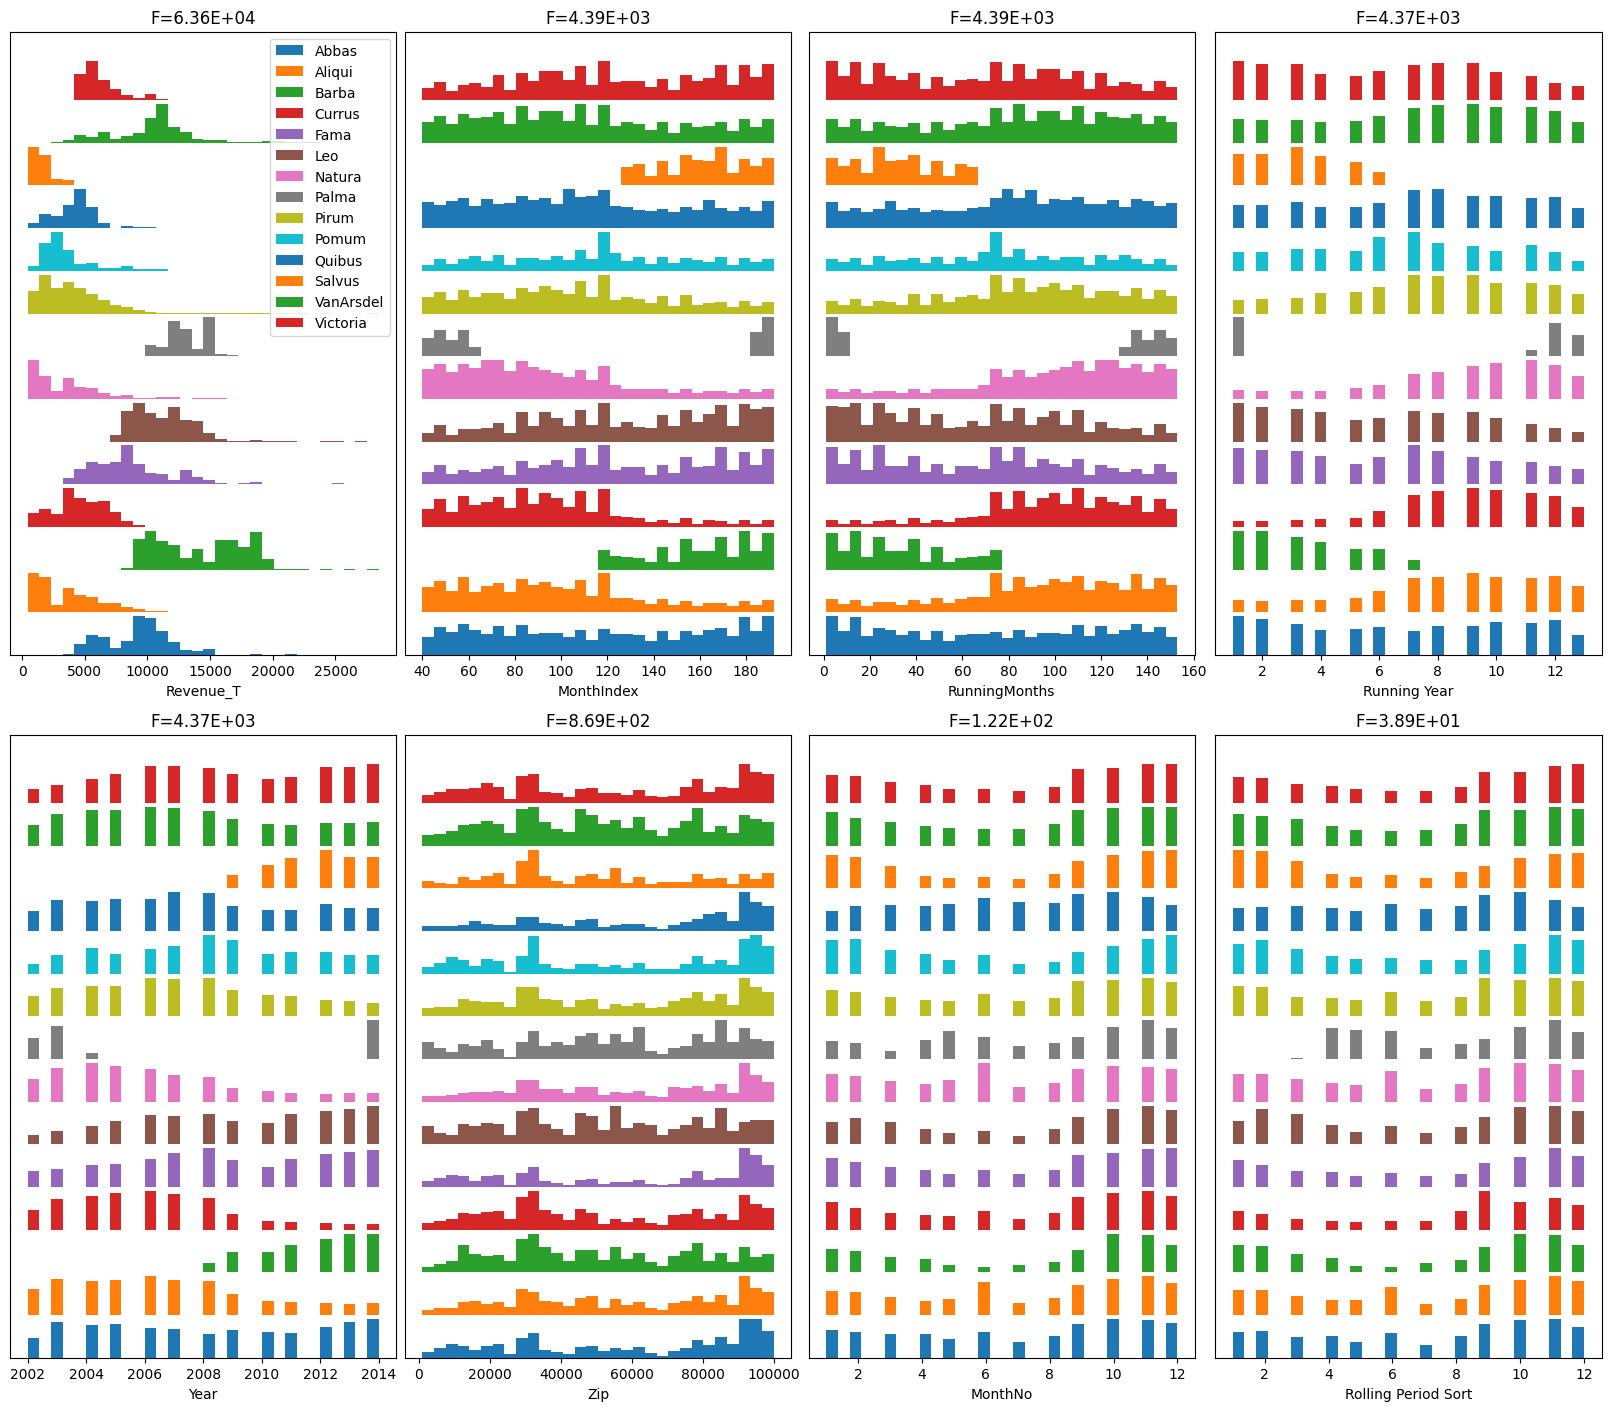

/venv_eda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


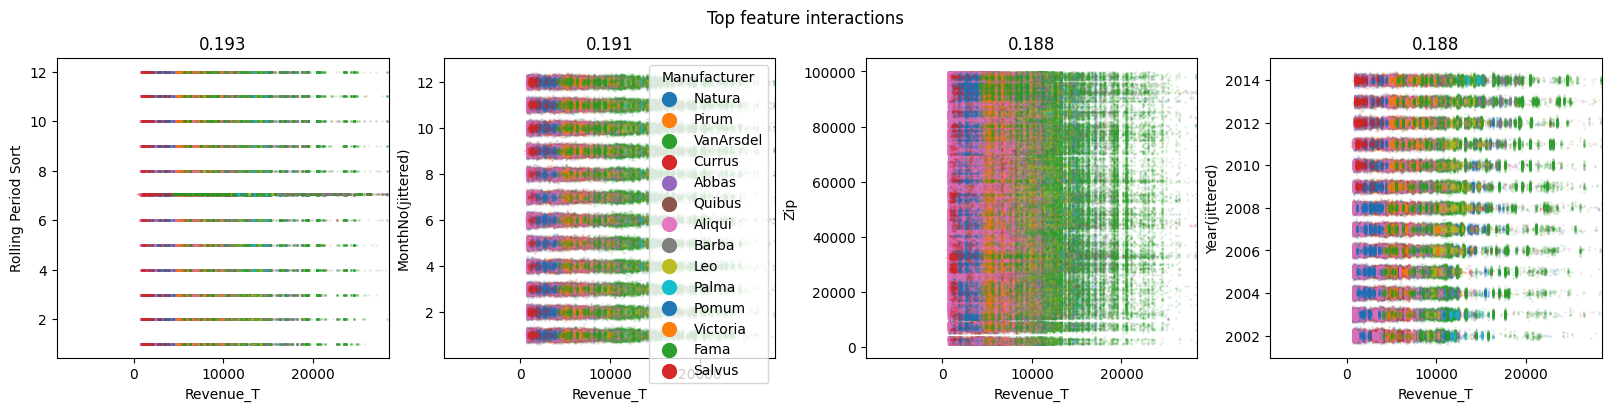

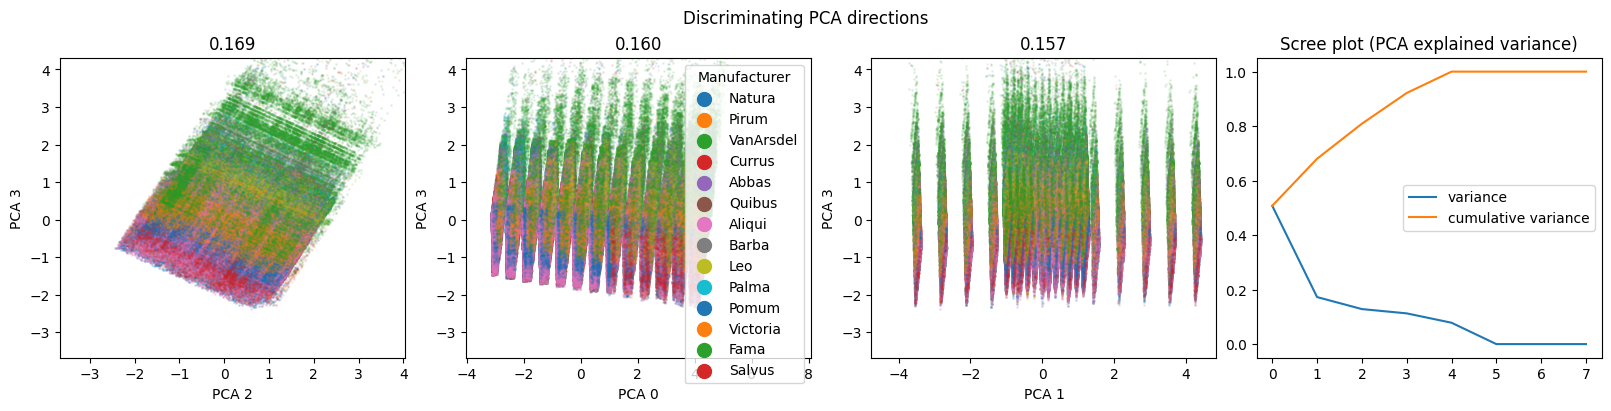

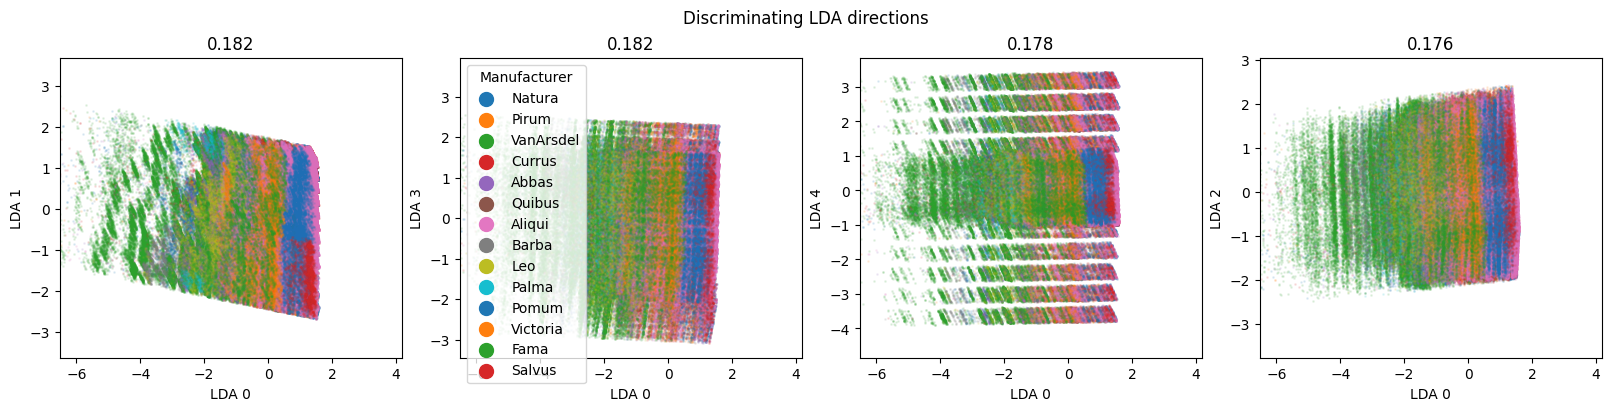

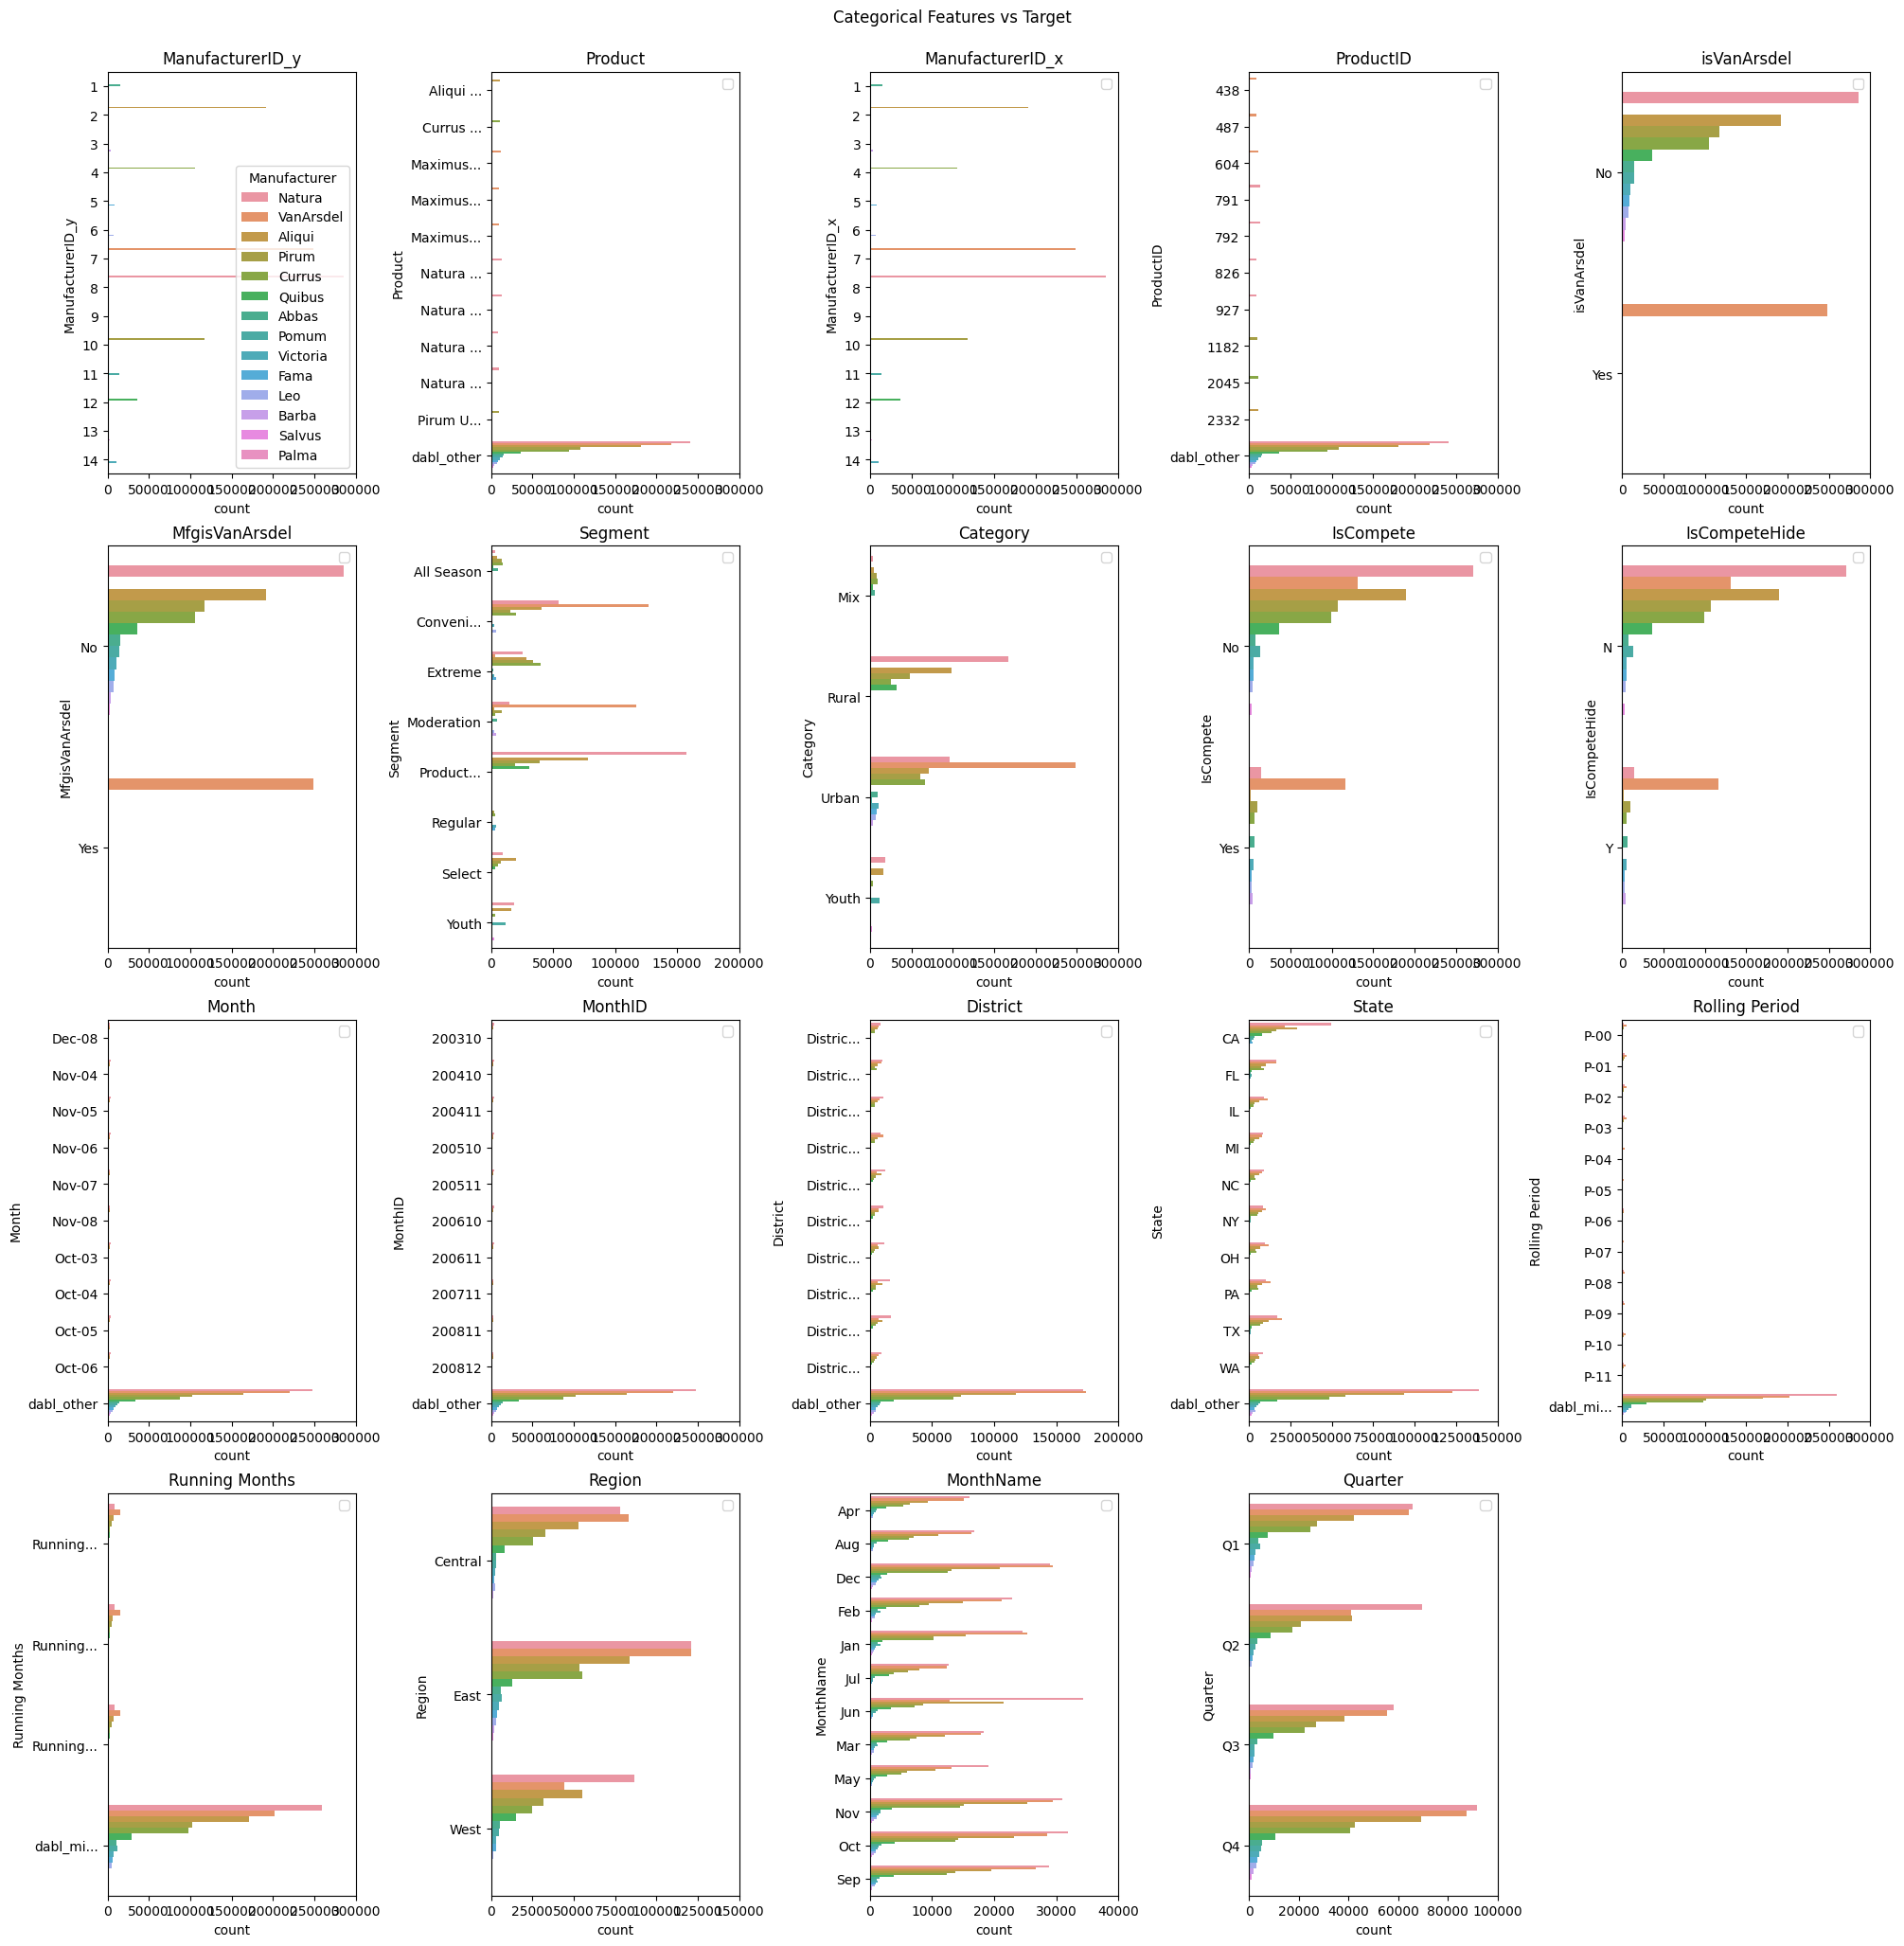

In [3]:
dabl.plot(df4eda, 'Manufacturer') 

# Вторая итерация

In [4]:
file = 'df4eda2clean2.csv'
df4eda2clean2 = pd.read_csv(file, index_col=0)
df4eda2clean2

,ProductID,Units,Revenue_T,Category,ManufacturerID_x,IsCompete,MonthNo,Year,City,State
0,981,12,31676.40,Urban,8,No,12,2014,"Newington, CT",CT
1,1086,7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA
2,1085,7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA
3,489,3,35010.36,Urban,7,Yes,12,2014,"Melbourne, FL",FL
4,1989,3,16441.11,Rural,4,No,12,2014,"Saint George, UT",UT
...,...,...,...,...,...,...,...,...,...,...
1048570,990,1,5291.37,Urban,8,No,4,2002,"Islip Terrace, NY",NY
1048571,990,1,5291.37,Urban,8,No,4,2002,"Waynesboro, MS",MS
1048572,2169,1,6614.37,Urban,14,No,4,2002,"Bremerton, WA",WA
1048573,1144,1,4976.37,Urban,10,Yes,4,2002,"Felton, CA",CA


In [5]:
types = dabl.detect_types(df4eda2clean2)

In [6]:
types

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
ProductID,False,False,False,True,False,False,False,False
Units,False,False,False,False,False,False,False,True
Revenue_T,True,False,False,False,False,False,False,False
Category,False,False,False,False,True,False,False,False
ManufacturerID_x,False,False,False,True,False,False,False,False
IsCompete,False,False,False,False,True,False,False,False
MonthNo,False,False,True,False,False,False,False,False
Year,False,False,True,False,False,False,False,False
City,False,False,False,False,False,False,True,False
State,False,False,False,False,True,False,False,False


/venv_eda/lib/python3.9/site-packages/dabl/plot/supervised.py:622: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Linear Discriminant Analysis training set score: 0.123


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='ManufacturerID_x'>,
 [array([[<Axes: ylabel='Revenue_T'>, <Axes: >, <Axes: >],
         [<Axes: ylabel='MonthNo'>, <Axes: >, <Axes: >],
         [<Axes: xlabel='Revenue_T', ylabel='Year'>,
          <Axes: xlabel='MonthNo'>, <Axes: xlabel='Year'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1200x400 with 3 Axes>],
 array([[<Axes: title={'center': 'ProductID'}, xlabel='count', ylabel='ProductID'>,
         <Axes: title={'center': 'Category'}, xlabel='count', ylabel='Category'>,
         <Axes: title={'center': 'IsCompete'}, xlabel='count', ylabel='IsCompete'>,
         <Axes: title={'center': 'State'}, xlabel='count', ylabel='State'>]],
       dtype=object)]

/venv_eda/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


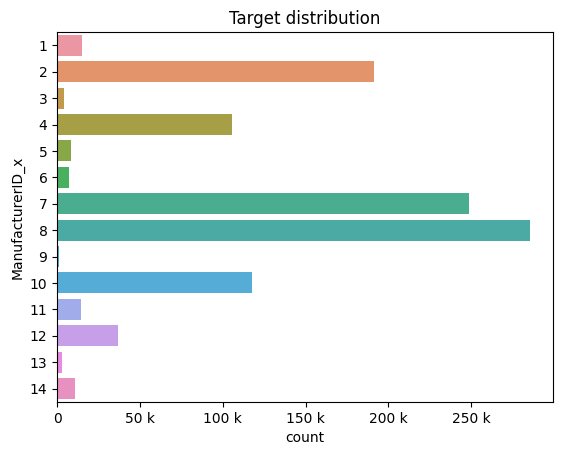

/venv_eda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


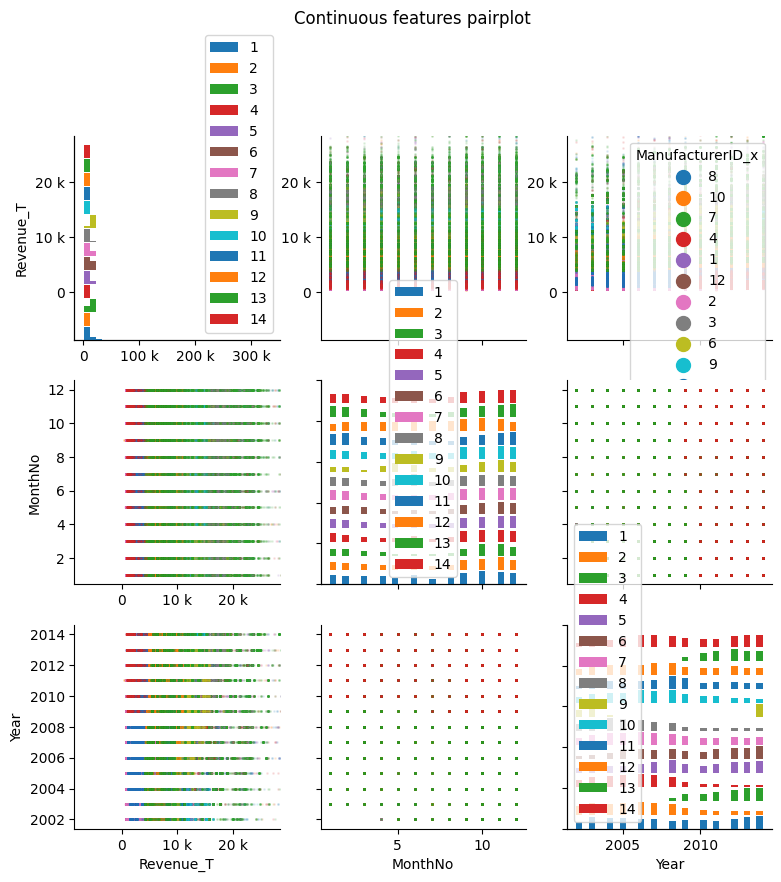

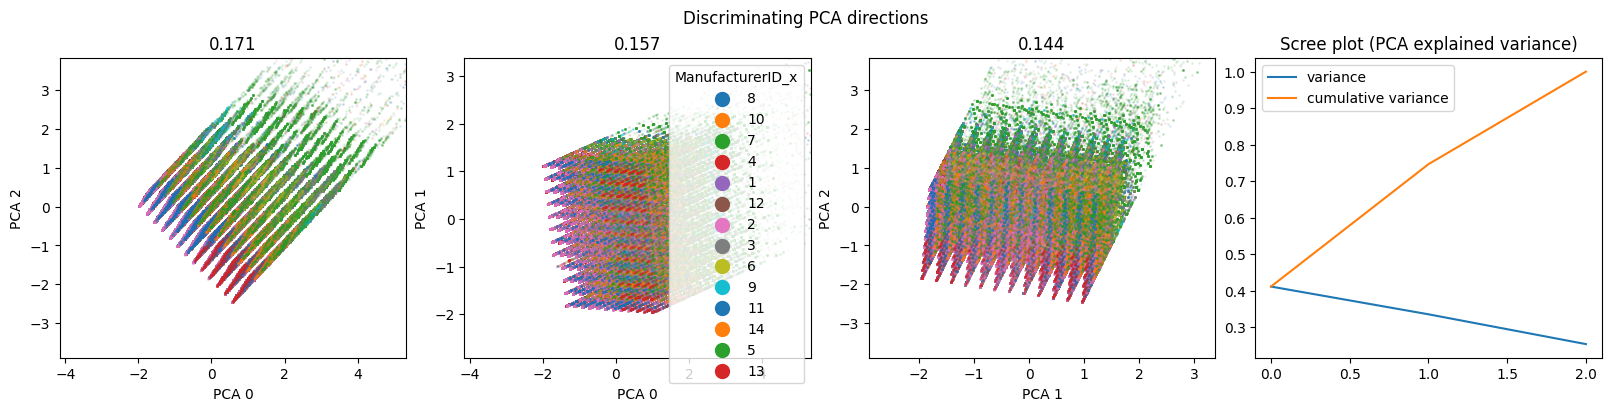

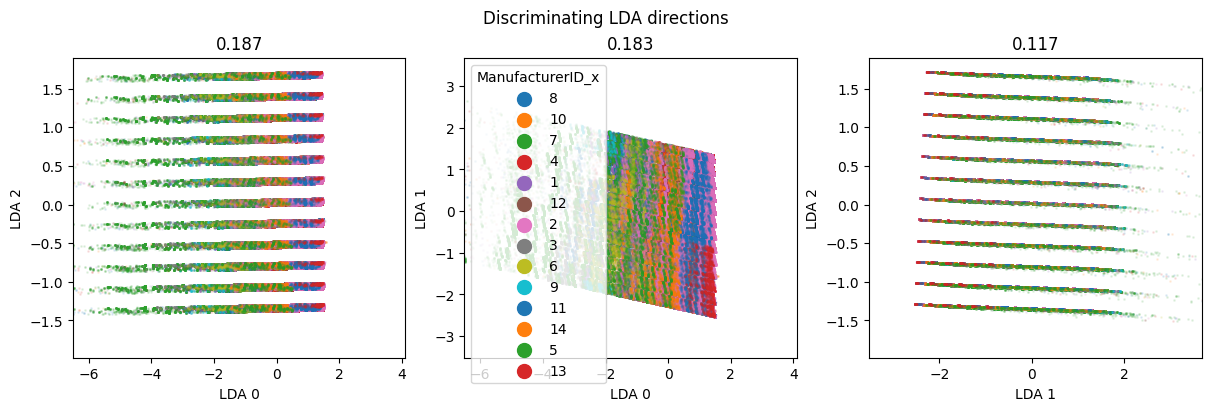

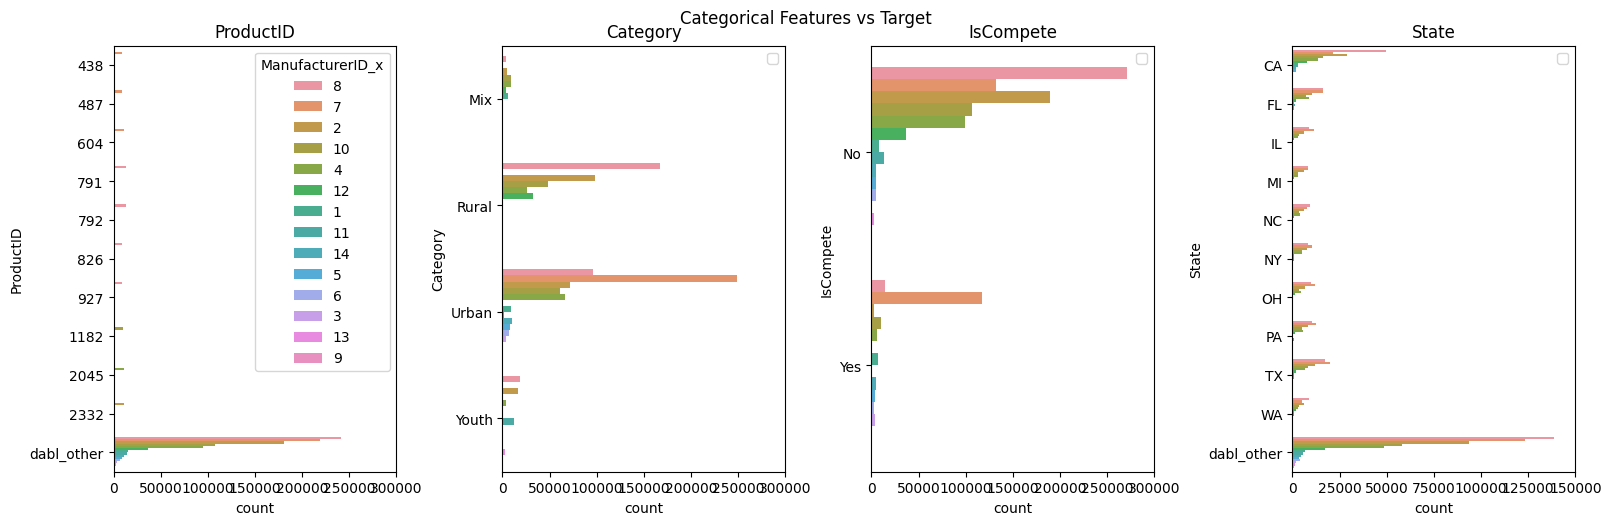

In [7]:
dabl.plot(df4eda2clean2, 'ManufacturerID_x') 